In [183]:
pip install matplotlib-venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32154 sha256=821735fca61227b9655344d73bed5f5a44b71557755729ed1796a3a51a149558
  Stored in directory: /home/raquelmax/.cache/pip/wheels/a8/2e/f9/6939e56698c94559ea6a2f5797cef8345981657b03cdfb8c72
Successfully built matplotlib-venn
You should consider upgrading via the '/home/raquelmax/.virtualenvs/db-mining-pBhgzAM8/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
from matplotlib_venn import venn2_unweighted 

import os
from util import HISTORICAL_FILE_JOIN, HISTORICAL_FILE_JOIN_DB, RESOURCE_DIR

In [28]:
#from util import DATABASES_MODELS

In [42]:
df = pd.read_excel(HISTORICAL_FILE_JOIN, keep_default_na=False)
#reads projects from Excel file
len(df)
df.head()

,PROJECTS,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
df.rename(columns={'MS Access': 'MS_Access', 'IBM DB2': 'IBM_DB2','Cosmos BD':'Cosmos_DB','MS SQL Server':'MS_SQL_Server'}, inplace=True)
df.rename(columns={'Join_Ignite-Sql':'Ignite_Sql','Join_Ignite-NoSql':'Ignite_NoSql','Join_MarkLogic-Sql':'MarkLogic_Sql',
                    'Join_MarkLogic-NoSql':'MarkLogic_NoSql','Join_Virtuoso-Sql':'Virtuoso_Sql','Join_Virtuoso-NoSql':'Virtuoso_NoSql'}, inplace=True)
print(df.columns)

Index(['PROJECTS', 'COMMITS', 'Memcached', 'Microsoft Azure Table Storage',
       'FileMaker', 'Riak KV', 'Hive', 'Redis', 'Aerospike',
       'Google Cloud Datastore', 'MariaDB', 'Neo4j', 'H2', 'Google BigQuery',
       'HBase', 'Netezza', 'Elasticsearch', 'SapHana', 'Oracle', 'OrientDB',
       'DynamoDB', 'Firebird', 'Informix', 'IBM_DB2', 'Couchbase',
       'Firebase Realtime', 'MongoDB', 'Hazelcast', 'Impala', 'Influx DB',
       'SQLite', 'Solr', 'Snowflake', 'Amazon Redshift', 'PostgreSQL', 'Realm',
       'Cassandra', 'MS_SQL_Server', 'Ehcache', 'Microsoft Azure CosmosDB',
       'MS_Access', 'SAP Adaptive Server', 'CouchDB', 'ClickHouse', 'Vertica',
       'Teradata', 'PostGIS', 'Etcd', 'MySQL', 'Ignite_Sql', 'Ignite_NoSql',
       'MarkLogic_Sql', 'MarkLogic_NoSql', 'Virtuoso_Sql', 'Virtuoso_NoSql'],
      dtype='object')


In [44]:
df.rename(columns={'PROJECTS' : 'DataBases'}, inplace=True)
print(df.columns)

Index(['DataBases', 'COMMITS', 'Memcached', 'Microsoft Azure Table Storage',
       'FileMaker', 'Riak KV', 'Hive', 'Redis', 'Aerospike',
       'Google Cloud Datastore', 'MariaDB', 'Neo4j', 'H2', 'Google BigQuery',
       'HBase', 'Netezza', 'Elasticsearch', 'SapHana', 'Oracle', 'OrientDB',
       'DynamoDB', 'Firebird', 'Informix', 'IBM_DB2', 'Couchbase',
       'Firebase Realtime', 'MongoDB', 'Hazelcast', 'Impala', 'Influx DB',
       'SQLite', 'Solr', 'Snowflake', 'Amazon Redshift', 'PostgreSQL', 'Realm',
       'Cassandra', 'MS_SQL_Server', 'Ehcache', 'Microsoft Azure CosmosDB',
       'MS_Access', 'SAP Adaptive Server', 'CouchDB', 'ClickHouse', 'Vertica',
       'Teradata', 'PostGIS', 'Etcd', 'MySQL', 'Ignite_Sql', 'Ignite_NoSql',
       'MarkLogic_Sql', 'MarkLogic_NoSql', 'Virtuoso_Sql', 'Virtuoso_NoSql'],
      dtype='object')


In [45]:
df

,DataBases,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Ignite_Sql,Ignite_NoSql,MarkLogic_Sql,MarkLogic_NoSql,Virtuoso_Sql,Virtuoso_NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3266,maxwell,7,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3267,maxwell,8,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3268,maxwell,9,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
df = df.groupby("DataBases").sum()
df

,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,MariaDB,...,Teradata,PostGIS,Etcd,MySQL,Ignite_Sql,Ignite_NoSql,MarkLogic_Sql,MarkLogic_NoSql,Virtuoso_Sql,Virtuoso_NoSql
DataBases,,,,,,,,,,,,,,,,,,,,,
Activiti,55,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
AmazeFileManager,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Android-IMSI-Catcher-Detector,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anki-Android,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AntennaPod,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeebe,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeppelin,55,0,0,0,0,9,8,0,10,7,...,0,0,0,8,0,8,0,0,0,0
zipkin,55,0,0,0,0,0,0,0,0,7,...,0,0,0,9,0,0,0,0,0,0


In [47]:
#Para apresentar quantos BDs apareceram por Projeto
def num_missing(x):
   return sum(x >= 1)
df.apply(num_missing, axis=1).sort_values()
#df.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False)
df

,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,MariaDB,...,Teradata,PostGIS,Etcd,MySQL,Ignite_Sql,Ignite_NoSql,MarkLogic_Sql,MarkLogic_NoSql,Virtuoso_Sql,Virtuoso_NoSql
DataBases,,,,,,,,,,,,,,,,,,,,,
Activiti,55,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
AmazeFileManager,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Android-IMSI-Catcher-Detector,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anki-Android,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AntennaPod,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeebe,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeppelin,55,0,0,0,0,9,8,0,10,7,...,0,0,0,8,0,8,0,0,0,0
zipkin,55,0,0,0,0,0,0,0,0,7,...,0,0,0,9,0,0,0,0,0,0


In [48]:
#df = df.groupby("DataBases").sum()
#df2 = df["COMMITS"].sum().sort_values(ascending=False)
#df2.iloc[: , 1:] => para ocultar a linha COMMITS
df= df.iloc[: ,1:]
df2 = df.T
df2

DataBases,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Memcached,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Microsoft Azure Table Storage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Riak KV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
Redis,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,8,0,0,0
Aerospike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google Cloud Datastore,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,10,0,0,0
MariaDB,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,7,7,0,0
Neo4j,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0


In [49]:
df2['SumperDatabase'] = df.apply(num_missing, axis=0).sort_values(ascending=False)
df2

DataBases,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,SumperDatabase
Memcached,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
Microsoft Azure Table Storage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Riak KV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,11
Redis,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,8,0,0,0,64
Aerospike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Google Cloud Datastore,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,10,0,0,0,22
MariaDB,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,7,7,0,0,43
Neo4j,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,4


In [50]:
df2.columns

Index(['Activiti', 'AmazeFileManager', 'Android-IMSI-Catcher-Detector',
       'Anki-Android', 'AntennaPod', 'AnySoftKeyboard', 'Apktool', 'Arduino',
       'AsciidocFX', 'BIMserver',
       ...
       'xabber-android', 'yacy_search_server', 'zalenium', 'zaproxy', 'zeebe',
       'zeppelin', 'zipkin', 'zookeeper', 'zotfile', 'SumperDatabase'],
      dtype='object', name='DataBases', length=324)

In [51]:
HISTORICAL_FILE_JOIN_DB = RESOURCE_DIR + os.sep + 'historical_join_db2.xlsx' #add in util.py
df2.to_excel(HISTORICAL_FILE_JOIN_DB, index=True) 
#df2 = df2.to_excel("historical_coluna.xlsx", index=False)

In [53]:
df3 = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_join_db2.xlsx', keep_default_na=False) #HISTORICAL_FILE_JOIN_DB
#df3 = pd.read_excel('historical_coluna.xlsx', keep_default_na=False)
#reads projects from Excel file
len(df3)
df3.head()

,Unnamed: 0,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,...,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,SumperDatabase
0,Memcached,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,Microsoft Azure Table Storage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,FileMaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Riak KV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,11


Renomeando a coluna Unnamed para databases

In [54]:
df3.rename(columns={'Unnamed: 0': 'DataBases'}, inplace=True)
df3.columns

Index(['DataBases', 'Activiti', 'AmazeFileManager',
       'Android-IMSI-Catcher-Detector', 'Anki-Android', 'AntennaPod',
       'AnySoftKeyboard', 'Apktool', 'Arduino', 'AsciidocFX',
       ...
       'xabber-android', 'yacy_search_server', 'zalenium', 'zaproxy', 'zeebe',
       'zeppelin', 'zipkin', 'zookeeper', 'zotfile', 'SumperDatabase'],
      dtype='object', length=325)

In [55]:
DATABASES_MODELS = RESOURCE_DIR + os.sep + 'databases_models.xlsx'
df4 = pd.read_excel(DATABASES_MODELS, keep_default_na=False) #add in util.py
#reads projects from Excel file

len(df4)
df4.head()

,DataBases,Primary Model,Second Model,Model
0,Aerospike,Key-value,Multi-model,NoSQL
1,Amazon Redshift,Relational,,SQL
2,Cassandra,Wide column,,NoSQL
3,ClickHouse,Relational,Multi-model,SQL
4,Couchbase,Document,Multi-model,NoSQL


In [92]:
df_merge= pd.merge(df4, df3, left_on= 'DataBases', right_on='DataBases')

df_merge

,DataBases,Primary Model,Second Model,Model,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,...,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,SumperDatabase
0,Aerospike,Key-value,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Amazon Redshift,Relational,,SQL,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,6
2,Cassandra,Wide column,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,8,9,0,0,18
3,ClickHouse,Relational,Multi-model,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,Couchbase,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,CouchDB,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,DynamoDB,Multi-model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
7,Ehcache,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57
8,Elasticsearch,Search engine,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,8,7,2,0,0,26
9,Etcd,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


Agrupando por modelos

In [57]:
df_model = df_merge.copy()
df_model = df_model.groupby(['Model']).sum()
#df_merge.groupby('Model').agg({'DataBases':'size'})
df_model

,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,SumperDatabase
Model,,,,,,,,,,,,,,,,,,,,,
NoSQL,0,0,1,0,0,0,0,0,1,4,...,9,6,0,0,8,62,12,0,0,363
SQL,41,0,0,0,0,0,0,5,4,20,...,0,20,0,20,0,48,26,2,0,568


In [59]:
def num_missing (x):
      return sum (x >= 1)
df5 = df_model.iloc[:,:323].apply(num_missing, axis=1).sort_values(ascending=False)
df5

Model
SQL      156
NoSQL    146
dtype: int64

Substituindo todos os valores por 1 para realizar a interseção. A função mask substitui os valores do dataframe no caso da condição ser verdadeira, caso necessite que a condição seja falsa, deve-se utilizar a função where, exemplo: df.mask(df_merge > 1, 1), neste caso a substituição só seria feita para os valores que fossem menores que 1 (o inverso da condição).

In [60]:
df5 = df_model.mask(df_model > 1, 1)
df5

,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,SumperDatabase
Model,,,,,,,,,,,,,,,,,,,,,
NoSQL,0,0,1,0,0,0,0,0,1,1,...,1,1,0,0,1,1,1,0,0,1
SQL,1,0,0,0,0,0,0,1,1,1,...,0,1,0,1,0,1,1,1,0,1


Criar duas tabelas, cada uma com uma das linhas nosql e a outra sql, tranformar todos os valores em 1 e depois fazer o merge com a interseção conforme exemplo 1 de https://www.geeksforgeeks.org/intersection-of-two-dataframe-in-pandas-python/
Daí da soma dos dois modelos, tirar este valor da interseção.

In [13]:
df6= df5.iloc[1:2,:]
df6

,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Model,,,,,,,,,,,,,,,,,,,,,
SQL,1,0,0,0,0,0,0,1,1,1,...,0,0,1,0,1,0,1,1,1,0


In [14]:
df7=df5.iloc[0:1,:]
df7

,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Model,,,,,,,,,,,,,,,,,,,,,
NoSQL,0,0,1,0,0,0,0,0,1,1,...,0,1,1,0,0,1,1,1,0,0


In [16]:
df8 = pd.concat([df6, df7], axis=0, join='inner').sum().sort_values(ascending =False)
df8

intellij-community    2
osmdroid              2
nomulus               2
error-prone           2
onedev                2
                     ..
docker-client         0
oshi                  0
phpinspectionsea      0
cryptomator           0
zotfile               0
Length: 323, dtype: int64

Para pegar a interseção, busco com a função isin as linhas (projetos) cujo o valor concatenado == 2, esta função retorna true ou false e somo as linhas que atenderam à condição.

In [17]:
df8.isin([2]).sum()

102

In [38]:
df_prisec = df_merge.copy()
df_prisec = df_prisec.groupby(['Primary Model']).sum()
#df_prisec = df_prisec.groupby(['Primary Model','Second Model']).sum()
#df_merge.groupby('Model').agg({'DataBases':'size'})
df_prisec

,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Primary Model,,,,,,,,,,,,,,,,,,,,,
Document,0,0,1,0,0,0,0,0,1,0,...,0,9,0,0,0,0,15,0,0,0
Graph,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
Key-value,0,0,0,0,0,0,0,0,0,4,...,0,0,1,0,0,0,11,0,0,0
Multi-model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
Relational,41,0,0,0,0,0,0,5,4,20,...,0,0,20,0,20,0,48,26,2,0
Search engine,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,8,7,2,0,0
Spatial DBMS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Time Series,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Wide column,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,10,0,0


Quero contar os modelos primários e secundários e mostrar num gráfico. Os valores abaixo não estão tirando as interseções.

In [39]:
def num_missing (x):
      return sum (x >= 1)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#without COMMITS
df10 = df_prisec.iloc[:,:].apply(num_missing, axis=1).sort_values(ascending=False)
#df6 = df_merge.iloc[:,:].apply(num_missing, axis=0).sort_values(ascending=False) para mostrar os projetos
df10

Primary Model
Relational       156
Key-value        104
Document          71
Search engine     33
Wide column       26
Multi-model       22
Spatial DBMS       7
Time Series        4
Graph              4
dtype: int64

Ajustar para contar os modelos secundários

In [40]:
df_prisec = df_merge.copy()
df_prisec = df_prisec.groupby(['Second Model']).sum()
df_prisec

,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Second Model,,,,,,,,,,,,,,,,,,,,,
,0,0,1,0,0,0,0,0,1,0,...,0,9,0,0,8,0,53,14,0,0
Multi-model,41,0,0,0,0,0,0,5,4,24,...,0,0,26,0,12,8,57,24,2,0
Relational,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df11 = df_prisec.mask(df_prisec> 1, 1)
df11

,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Second Model,,,,,,,,,,,,,,,,,,,,,
,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0
Multi-model,1,0,0,0,0,0,0,1,1,1,...,0,0,1,0,1,1,1,1,1,0
Relational,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df11.isin([1]).sum(axis = 1)

Second Model
               132
Multi-model    167
Relational       8
dtype: int64

In [44]:
df12 = df_prisec.mask(df_prisec> 1, 1)
df12

,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Second Model,,,,,,,,,,,,,,,,,,,,,
,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0
Multi-model,1,0,0,0,0,0,0,1,1,1,...,0,0,1,0,1,1,1,1,1,0
Relational,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df12.isin([1]).sum(axis = 1)

Second Model
               132
Multi-model    167
Relational       8
dtype: int64

In [ ]:
df13 = df_prisec.mask(df_prisec> 1, 1)
df13

In [84]:
df13.isin([1]).sum(axis = 1)

Second Model
               132
Multi-model    167
Relational       8
dtype: int64

In [81]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 99 kB/s eta 0:00:013
You should consider upgrading via the '/home/raquelmax/.local/share/virtualenvs/db-mining-pBhgzAM8/bin/python -m pip install --upgrade pip' command.


In [114]:
pd.options.plotting.backend = "plotly"

In [203]:
#df_merge = df_merge['SumperDatabase'].sort_values(ascending=False)
df20 = df_merge.sort_values(by = 'SumperDatabase', ascending = False)
#df20.columns.rename("DataBases":"Databases", "SumperDatabase":"Projects")
df20.rename(columns = {'DataBases':'Databases','SumperDatabase':'Projects'}, inplace = True)
df20

,Databases,Primary Model,Second Model,Model,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,...,xabber-android,yacy_search_server,zalenium,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,Projects
34,MySQL,Relational,Multi-model,SQL,6,0,0,0,0,0,...,0,10,0,6,0,8,9,2,0,110
15,H2,Relational,Multi-model,SQL,9,0,0,0,0,0,...,0,0,0,0,0,7,3,0,0,76
40,PostgreSQL,Relational,Multi-model,SQL,6,0,0,0,0,0,...,0,10,0,0,0,9,3,0,0,75
37,Oracle,Relational,Multi-model,SQL,6,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,65
42,Redis,Key-value,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,64
7,Ehcache,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57
25,MariaDB,Relational,Multi-model,SQL,0,0,0,0,0,0,...,0,0,0,0,0,7,7,0,0,43
31,MongoDB,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,38
48,SQLite,Relational,,SQL,0,0,0,0,0,0,...,0,0,0,8,0,0,4,0,0,37
33,MS_SQL_Server,Relational,Multi-model,SQL,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,36


In [204]:



df20.plot(kind='bar', x = 'Databases', y = 'Projects',color='Model', title='Comparative distribution between data models')


In [205]:
df20.plot( kind='area', x = 'Databases', y = 'Projects', color='Model', title='Comparative growth among data models')#


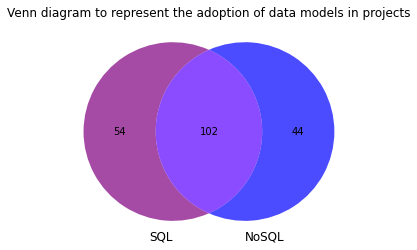

In [211]:
#intersection = df8.isin([2]).sum()
#vSql= df5['Model'].values() == 'SQL'

from turtle import color, title


venn2_unweighted(subsets = (54, 44, 102, 0),
                 set_labels = ('SQL', 
                               'NoSQL'),
                 set_colors=("purple",
                             "blue","white"),alpha=0.7)
plt.title('Venn diagram to represent the adoption of data models in projects')
plt.show()